In [1]:
import numpy as np
import pandas as pd 

In [2]:
df = pd.read_excel("cleaned_extracted_data.xlsx")
df = df[['SuccessRate', 'Perturbation_Mag', 'VisualSimilarity', 'Avg_Confidence', 'Confidence_Gap', 'Score']]

In [3]:
print(df.head())
df.describe()

   SuccessRate  Perturbation_Mag  VisualSimilarity  Avg_Confidence  \
0        1.000            3.3926            0.9369          0.9835   
1        1.000           10.0055            0.6588          0.9848   
2        1.000            1.2206            0.9887          0.9104   
3        0.985            1.5036            0.9870          0.9958   
4        1.000            2.2847            0.9572          0.9025   

   Confidence_Gap   Score  
0         -0.0519  0.7910  
1         -0.0531  0.6996  
2          0.0212  0.8131  
3         -0.0651  0.8086  
4          0.0291  0.8011  


,SuccessRate,Perturbation_Mag,VisualSimilarity,Avg_Confidence,Confidence_Gap,Score
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,0.722667,2.147874,0.950026,0.835153,-0.079274,0.724842
std,0.391598,4.709204,0.158839,0.152839,0.280640,0.117996
min,0.043000,0.000000,0.002100,0.502400,-0.591600,0.436000
25%,0.402250,0.337000,0.983300,0.722200,-0.065325,0.574850
50%,0.950500,1.350400,0.989300,0.902500,-0.055800,0.802450
75%,0.992500,1.531400,0.999175,0.984275,0.029100,0.809700
max,1.000000,31.040300,1.000000,0.996200,0.425600,0.819800


In [4]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Initialize SimpleImputer with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on data_filtered and transform it
data_imputed = imputer.fit_transform(df)

# Convert the result back to a DataFrame (optional, if you want it in DataFrame format)
data_filtered = pd.DataFrame(data_imputed, columns=df.columns)

c:\Users\Elyas\anaconda3\envs\Machinelearning\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Elyas\anaconda3\envs\Machinelearning\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Elyas\anaconda3\envs\Machinelearning\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Elyas\anaconda3\envs\Machinelearning\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be

We'll now remove outliers 

<h2> Checking colinearity 

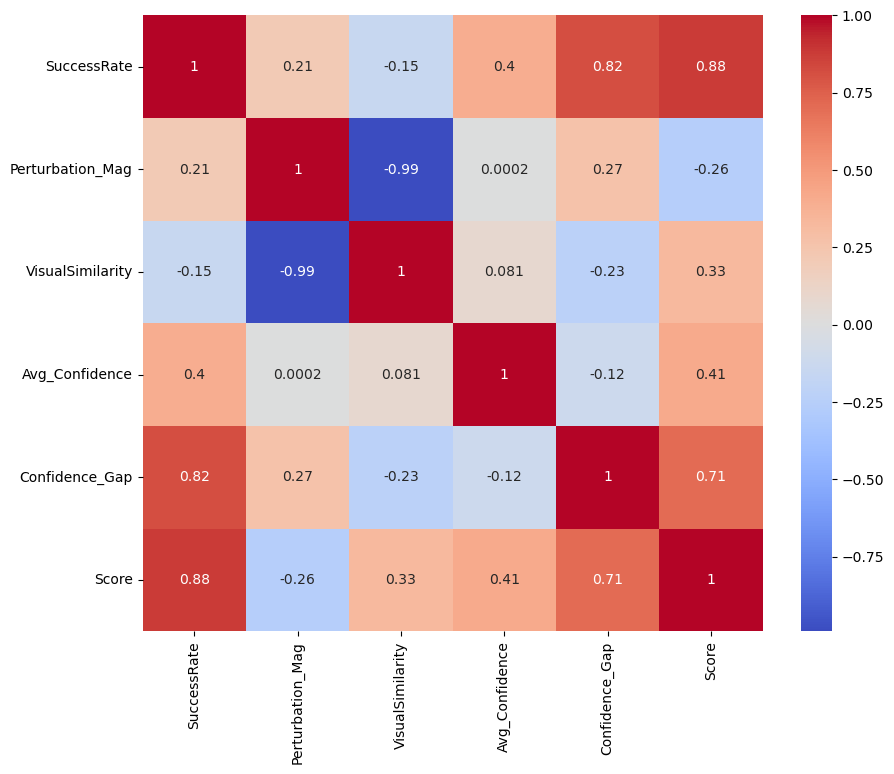

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = pd.DataFrame(df).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

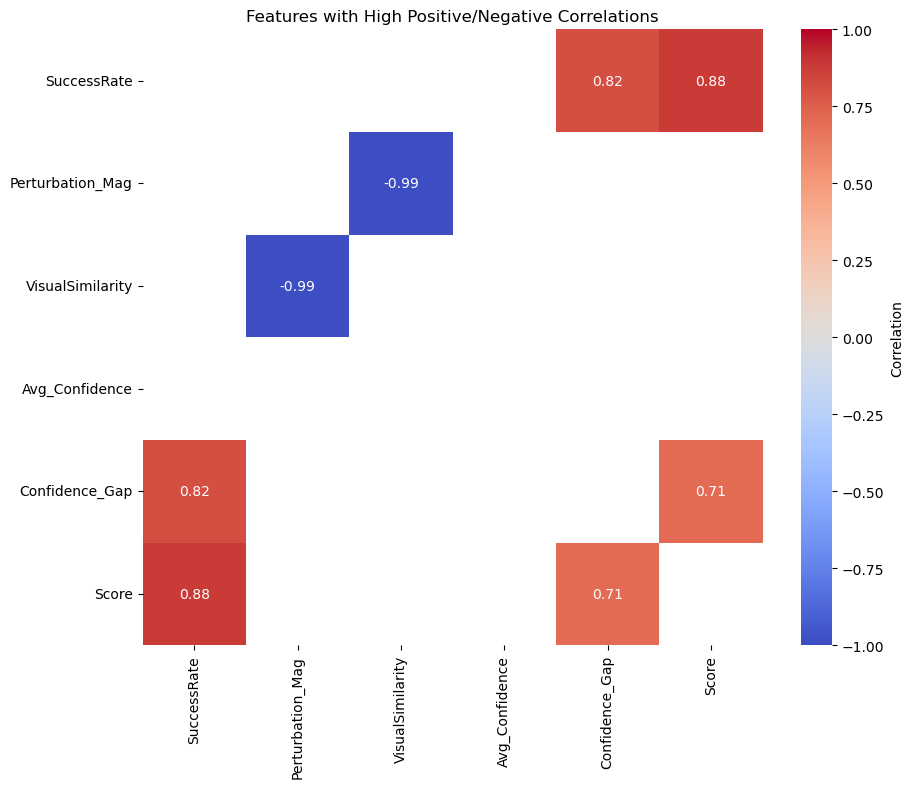

Highly correlated feature pairs (above 0.7 or below -0.7):
VisualSimilarity and Perturbation_Mag: -0.9920239549691647
Confidence_Gap and SuccessRate: 0.8186981764539332
Score and SuccessRate: 0.8786360612360271
Score and Confidence_Gap: 0.7058944203614934


In [6]:
corr_matrix = df.corr()

threshold = 0.7

high_corr = corr_matrix[(corr_matrix > threshold) | (corr_matrix < -threshold)]

np.fill_diagonal(high_corr.values, np.nan)

plt.figure(figsize=(10, 8))
sns.heatmap(high_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
plt.title('Features with High Positive/Negative Correlations')
plt.show()

correlated_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if (corr_matrix.iloc[i, j] > threshold) or (corr_matrix.iloc[i, j] < -threshold):
            correlated_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

print("Highly correlated feature pairs (above 0.7 or below -0.7):")
for pair in correlated_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")

<h2> Splitting Dataset

In [7]:
data_shuffled = df.sample(frac=1)

In [8]:
data_shuffled.shape

(66, 6)

In [9]:
X =  data_shuffled.drop('Score', axis=1)  # Features
y =  data_shuffled['Score']  # Target variable

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(59, 5)
(59,)
(7, 5)
(7,)


<h1> Scale Data </h1>

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)


scaler.fit(X_test)

X_test_scaled = scaler.transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

c:\Users\Elyas\anaconda3\envs\Machinelearning\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Elyas\anaconda3\envs\Machinelearning\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Elyas\anaconda3\envs\Machinelearning\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Elyas\anaconda3\envs\Machinelearning\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be

<h1> Linear Regression </h1>

In [ ]:
from sklearn import linear_model

model = linear_model.LinearRegression()

model.fit(X=X_train_scaled_df,
          y=y_train)

c:\Users\Elyas\anaconda3\envs\Machinelearning\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Elyas\anaconda3\envs\Machinelearning\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Elyas\anaconda3\envs\Machinelearning\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Elyas\anaconda3\envs\Machinelearning\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be

LinearRegression()

In [15]:
pred = model.predict(X_test_scaled_df )

c:\Users\Elyas\anaconda3\envs\Machinelearning\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Elyas\anaconda3\envs\Machinelearning\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Elyas\anaconda3\envs\Machinelearning\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


<h1> Evaluation </h1>

In [16]:
print(y_test.shape)
print(pred.shape)

def rmsle(y_true, y_pred):
    return np.sqrt(np.mean((np.log1p(y_true) - np.log1p(y_pred)) ** 2))


# Calculate RMSLE
rmsle_value = rmsle(y_test, pred)

print(f"Root Mean Square Logarithmic Error (RMSLE): {rmsle_value}")

(7,)
(7,)
Root Mean Square Logarithmic Error (RMSLE): 0.034332249209717496


<h1> Check For Overfitting

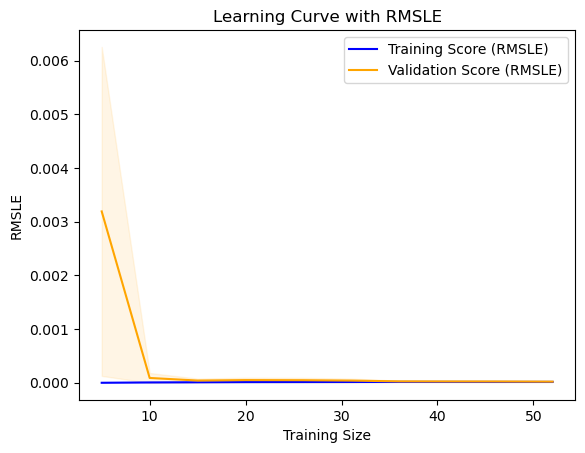

In [17]:
from sklearn.metrics import make_scorer, mean_squared_log_error
from sklearn.model_selection import learning_curve

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

train_sizes, train_scores, valid_scores = learning_curve(
    model, X, y, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring=rmsle_scorer
)


train_mean = -train_scores.mean(axis=1)
valid_mean = -valid_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
valid_std = valid_scores.std(axis=1)

plt.plot(train_sizes, train_mean, label='Training Score (RMSLE)', color='blue')
plt.plot(train_sizes, valid_mean, label='Validation Score (RMSLE)', color='orange')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color='orange', alpha=0.1)
plt.title('Learning Curve with RMSLE')
plt.xlabel('Training Size')
plt.ylabel('RMSLE')
plt.legend()
plt.show()

In [18]:
print(X_test)
print(pred)
print(y_test)

    SuccessRate  Perturbation_Mag  VisualSimilarity  Avg_Confidence  \
25        0.995            0.3494            0.9991          0.5730   
62        0.950            1.3510            0.9893          0.9819   
36        0.538            1.7249            0.9823          0.9068   
60        0.060            0.0005            1.0000          0.7372   
5         0.984            1.4541            0.9878          0.9949   
44        0.982            1.3056            0.9900          0.9907   
51        0.077            0.0314            1.0000          0.7762   

    Confidence_Gap  
25          0.3588  
62         -0.0538  
36         -0.0326  
60         -0.5816  
5          -0.0644  
44         -0.0603  
51         -0.5009  
[0.86370776 0.77203155 0.64595034 0.61197353 0.76638046 0.78300361
 0.63272393]
25    0.8191
62    0.8036
36    0.7225
60    0.5359
5     0.8088
44    0.8097
51    0.5585
Name: Score, dtype: float64


<h1> Get coeffs 

In [19]:
# Get the coefficients (weights for each feature)
coefficients = model.coef_

# Get the intercept (bias term)
intercept = model.intercept_

print("Intercept (bias):", intercept)
print("Coefficients (weights):", coefficients)

Intercept (bias): 0.7251101694915253
Coefficients (weights): [ 0.06446005 -0.02654128  0.03326105  0.02528755  0.04596439]


In [20]:
# Assuming X is a pandas DataFrame with column names for features
feature_names = X.columns

# Construct the formula string
formula = f"Score = {intercept:.4f}"
for coef, name in zip(coefficients, feature_names):
    formula += f" + ({coef:.4f} * {name})"

print("Formula:", formula)

Formula: Score = 0.7251 + (0.0645 * SuccessRate) + (-0.0265 * Perturbation_Mag) + (0.0333 * VisualSimilarity) + (0.0253 * Avg_Confidence) + (0.0460 * Confidence_Gap)


<h1> Try coeffs on some new data </h1>

In [21]:
df = pd.read_excel("data.xlsx")
df = df[['SuccessRate', 'Perturbation_Mag', 'VisualSimilarity', 'Avg_Confidence', 'Confidence_Gap']]

scaler = StandardScaler()

scaler.fit(df )

new_data = scaler.transform(df )

new_data = pd.DataFrame(new_data, columns=df.columns)

model.predict(new_data)

c:\Users\Elyas\anaconda3\envs\Machinelearning\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Elyas\anaconda3\envs\Machinelearning\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Elyas\anaconda3\envs\Machinelearning\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Elyas\anaconda3\envs\Machinelearning\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be

array([0.79050198, 0.77082945, 0.54733273, 0.79177651])